In [313]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2_contingency
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.utils import resample

Load Data

In [2]:
train_data=pd.read_csv('C:\\Users\\telug\\OneDrive\\Desktop\\DS\\Capstone\\Richters Predictor Modeling Earthquake Damage\\train_values.csv')
train_labels=pd.read_csv('C:\\Users\\telug\\OneDrive\\Desktop\\DS\Capstone\\Richters Predictor Modeling Earthquake Damage\\train_labels.csv')
test_data=pd.read_csv('C:\\Users\\telug\\OneDrive\\Desktop\DS\\Capstone\\Richters Predictor Modeling Earthquake Damage\\test_values.csv')

In [3]:
train_data.head(10)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
5,333020,8,558,6089,2,10,9,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,1,1,0,0,0,0,0,0,0,0,0
6,728451,9,475,12066,2,25,3,4,n,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
7,475515,20,323,12236,2,0,8,6,t,w,q,v,x,s,u,0,0,0,0,0,1,1,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
8,441126,0,757,7219,2,15,8,6,t,r,q,f,q,s,d,0,1,0,0,0,0,1,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
9,989500,26,886,994,1,0,13,4,t,i,n,v,j,s,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [4]:
train_data.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

In [5]:
train_data.shape

(260601, 39)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [7]:
train_data.isnull().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

In [8]:
train_labels.isnull().sum()

building_id     0
damage_grade    0
dtype: int64

checking if 'building_id' of train_data and 'building_id' of train_values are same

In [9]:
train_labels['building_id'].equals(train_data['building_id'])

True

In [10]:
#since both the columns represent same we can merge both the datasets 
merge_data = train_data.merge(train_labels, how = 'inner', on = 'building_id')

In [11]:
merge_data.head(5)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3


In [12]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

Data Distribution of target variable - 'damage_grade'

In [13]:
merge_data['damage_grade'].value_counts()

2    148259
3     87218
1     25124
Name: damage_grade, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

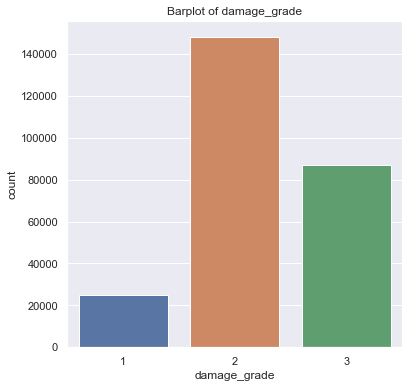

In [14]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(merge_data['damage_grade'])
plt.title('Barplot of damage_grade')
plt.show

From the plot it is very clear that the target variable data is heavily imblanced with grade 1 being very largely under 
represented compared to grade 2 and grade 3. It is important to note that we have to balance this data for us to use models 
like decision tress and random forests as these models are extremely sensitive towards imbalanced data

statistical tests on all predictor columns

'geo_level_1_id'

In [15]:
merge_data['geo_level_1_id'].value_counts()  #numerical

6     24381
26    22615
10    22079
17    21813
8     19080
7     18994
20    17216
21    14889
4     14568
27    12532
13     9608
11     8220
3      7540
22     6252
25     5624
16     4332
0      4011
9      3958
12     3194
18     3189
1      2701
5      2690
30     2686
15     2320
14     1714
24     1310
23     1121
2       931
29      396
19      372
28      265
Name: geo_level_1_id, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

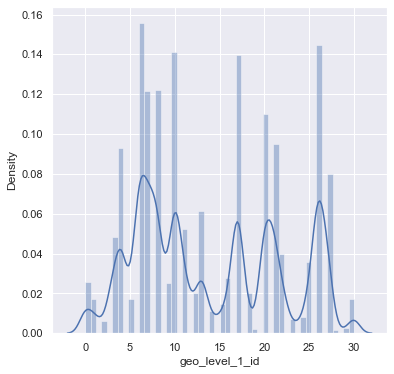

In [16]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(merge_data['geo_level_1_id'])
plt.show

<AxesSubplot:>

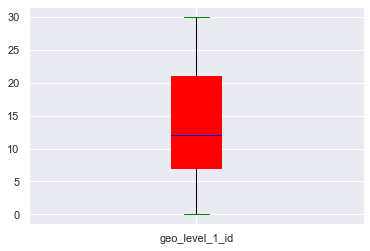

In [17]:
geo_level_1_id=merge_data['geo_level_1_id']
props2= dict(boxes='red',whiskers='black',medians='blue',caps='green')
geo_level_1_id.plot.box(color=props2,patch_artist=True,vert=True)

In [18]:
annova=ols('geo_level_1_id ~ damage_grade',data=merge_data).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))                      #good predictor

                    sum_sq        df           F  PR(>F)
damage_grade  8.803052e+04       1.0  1371.16109     0.0
Residual      1.673083e+07  260599.0         NaN     NaN


'geo_level_2_id'    

In [19]:
merge_data['geo_level_2_id'].value_counts()  #numerical

39      4038
158     2520
181     2080
1387    2040
157     1897
        ... 
1330       1
1043       1
637        1
989        1
627        1
Name: geo_level_2_id, Length: 1414, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

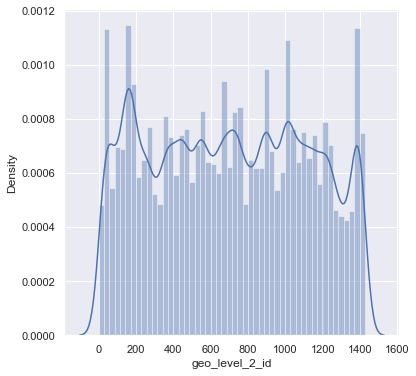

In [20]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(merge_data['geo_level_2_id'])
plt.show

<AxesSubplot:>

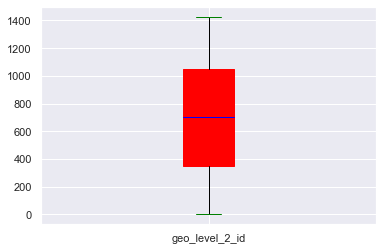

In [21]:
geo_level_2_id=merge_data['geo_level_2_id']
props2= dict(boxes='red',whiskers='black',medians='blue',caps='green')
geo_level_2_id.plot.box(color=props2,patch_artist=True,vert=True)

In [22]:
annova=ols('geo_level_2_id ~ damage_grade',data=merge_data).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))            #good predictor 

                    sum_sq        df          F  PR(>F)
damage_grade  8.268830e+07       1.0  486.36311     0.0
Residual      4.430535e+10  260599.0        NaN     NaN


'geo_level_3_id'

In [23]:
merge_data['geo_level_3_id'].value_counts()  #numerical

633      651
9133     647
621      530
11246    470
2005     466
        ... 
2366       1
7155       1
10733      1
97         1
3085       1
Name: geo_level_3_id, Length: 11595, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

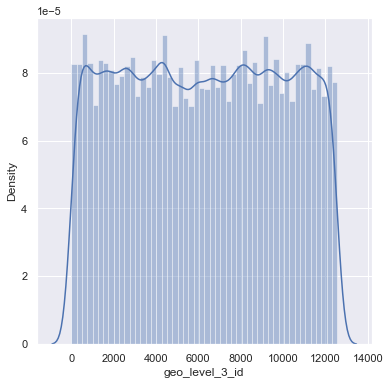

In [24]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(merge_data['geo_level_3_id'])
plt.show

<AxesSubplot:>

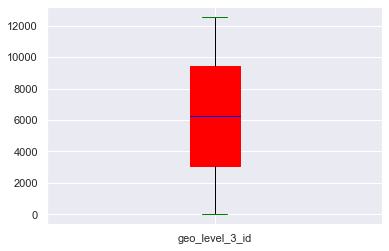

In [25]:
geo_level_3_id=merge_data['geo_level_3_id']
props2= dict(boxes='red',whiskers='black',medians='blue',caps='green')
geo_level_3_id.plot.box(color=props2,patch_artist=True,vert=True)

In [26]:
annova=ols('geo_level_3_id ~ damage_grade',data=merge_data).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))            #good predictor 

                    sum_sq        df         F   PR(>F)
damage_grade  2.179902e+08       1.0  16.39613  0.00005
Residual      3.464723e+12  260599.0       NaN      NaN


'count_floors_pre_eq'  #numerical
 number of floors in the building before the earthquake.

In [27]:
merge_data['count_floors_pre_eq'].value_counts()  #numerical(ordered)

2    156623
3     55617
1     40441
4      5424
5      2246
6       209
7        39
8         1
9         1
Name: count_floors_pre_eq, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

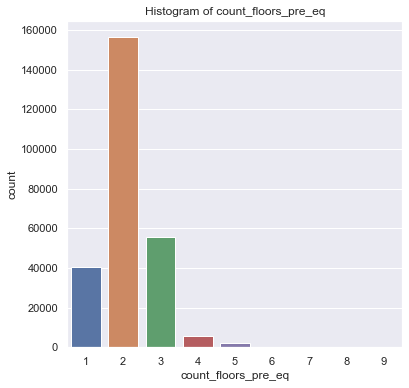

In [28]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(merge_data['count_floors_pre_eq'])
plt.title('Histogram of count_floors_pre_eq') 
plt.show

'age'  (continuous)
age of the building in years.

<function matplotlib.pyplot.show(close=None, block=None)>

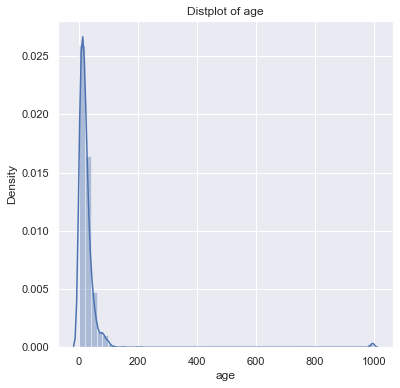

In [29]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(merge_data['age'])
plt.title('Distplot of age') 
plt.show

<AxesSubplot:>

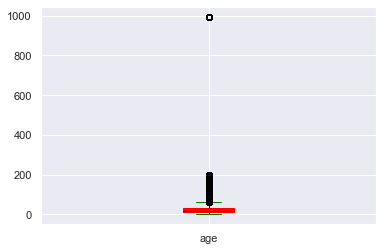

In [30]:
age=merge_data['age']
props2= dict(boxes='red',whiskers='black',medians='blue',caps='green')
age.plot.box(color=props2,patch_artist=True,vert=True)

In [31]:
def find_boundaries(df,feature):
    Q1=df[feature].quantile(.25)
    Q3=df[feature].quantile(.75)
    IQR=Q3-Q1
    lower_boundary=Q1-1.5*IQR
    upper_boundary=Q3+1.5*IQR
    
    return lower_boundary,upper_boundary

In [32]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [33]:
def remove_outlier(df_in,feature):
    Q1=df_in[feature].quantile(.25)
    Q3=df_in[feature].quantile(.75)
    IQR=Q3-Q1
    lower_boundary=Q1-1.5*IQR
    upper_boundary=Q3+1.5*IQR
    df_out=df_in.loc[(df_in[feature]>lower_boundary) & (df_in[feature]<upper_boundary)]
    
    return df_out

In [34]:
lower_age,upper_age=find_boundaries(merge_data,'age')
print(lower_age,upper_age)

-20.0 60.0


In [35]:
outliers = find_outliers_IQR(merge_data['age'])
print('number of outliers: '+ str(len(outliers)))

number of outliers: 12499


In [36]:
merge_data= remove_outlier(merge_data,'age')

<AxesSubplot:>

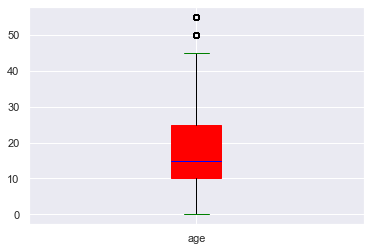

In [37]:
age=merge_data['age']
props2= dict(boxes='red',whiskers='black',medians='blue',caps='green')
age.plot.box(color=props2,patch_artist=True,vert=True)

In [38]:
annova=ols('age ~ damage_grade',data=merge_data).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))            #good predictor 

                    sum_sq        df           F  PR(>F)
damage_grade  1.325937e+06       1.0  7832.22502     0.0
Residual      4.138997e+07  244488.0         NaN     NaN


'area_percentage' #continous
normalized area of the building footprint.

<function matplotlib.pyplot.show(close=None, block=None)>

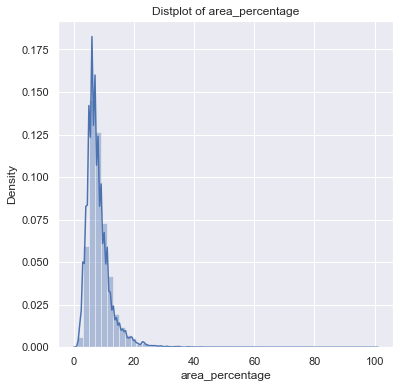

In [39]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(merge_data['area_percentage'])
plt.title('Distplot of area_percentage') 
plt.show

<AxesSubplot:>

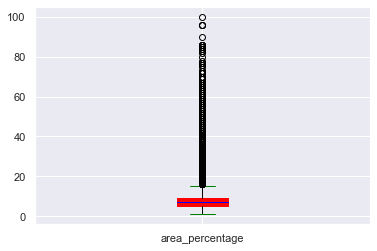

In [40]:
area_percentage=merge_data['area_percentage']
props2= dict(boxes='red',whiskers='black',medians='blue',caps='green')
area_percentage.plot.box(color=props2,patch_artist=True,vert=True)

In [41]:
lower_area_percentage,upper_area_percentage=find_boundaries(merge_data,'area_percentage')
print(lower_area_percentage,upper_area_percentage)

-1.0 15.0


In [42]:
outliers = find_outliers_IQR(merge_data['area_percentage'])
print('number of outliers: '+ str(len(outliers)))

number of outliers: 12818


In [43]:
merge_data= remove_outlier(merge_data,'area_percentage')

<AxesSubplot:>

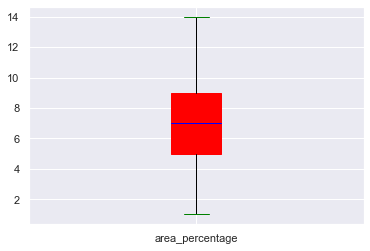

In [44]:
area_percentage=merge_data['area_percentage']
props2= dict(boxes='red',whiskers='black',medians='blue',caps='green')
area_percentage.plot.box(color=props2,patch_artist=True,vert=True)

In [45]:
annova=ols('age ~ area_percentage',data=merge_data).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))            #good predictor 

                       sum_sq        df         F   PR(>F)
area_percentage  2.993439e+03       1.0  17.17919  0.00003
Residual         3.979597e+07  228387.0       NaN      NaN


'height_percentage' (type: continuous): normalized height of the building footprint.

<function matplotlib.pyplot.show(close=None, block=None)>

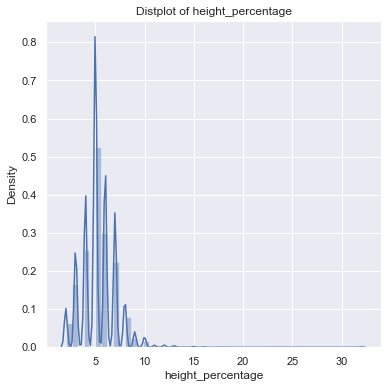

In [46]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(merge_data['height_percentage'])
plt.title('Distplot of height_percentage') 
plt.show

<AxesSubplot:>

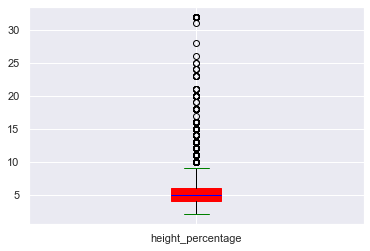

In [47]:
height_percentage=merge_data['height_percentage']
props2= dict(boxes='red',whiskers='black',medians='blue',caps='green')
height_percentage.plot.box(color=props2,patch_artist=True,vert=True)

In [48]:
lower_height_percentage,upper_height_percentage=find_boundaries(merge_data,'area_percentage')
print(lower_height_percentage,upper_height_percentage)

-1.0 15.0


In [49]:
outliers = find_outliers_IQR(merge_data['height_percentage'])
print('number of outliers: '+ str(len(outliers)))

number of outliers: 4059


In [50]:
merge_data= remove_outlier(merge_data,'height_percentage')

<AxesSubplot:>

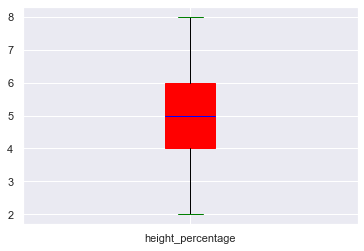

In [51]:
height_percentage=merge_data['height_percentage']
props2= dict(boxes='red',whiskers='black',medians='blue',caps='green')
height_percentage.plot.box(color=props2,patch_artist=True,vert=True)

In [52]:
annova=ols('age ~ height_percentage',data=merge_data).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))            #good predictor 

                         sum_sq        df          F  PR(>F)
height_percentage  1.041907e+06       1.0  6225.6698     0.0
Residual           3.696055e+07  220849.0        NaN     NaN


'land_surface_condition' (type: categorical): surface condition of the land where the building was built. Possible values: n, o, t.

In [53]:
merge_data['land_surface_condition'].value_counts()

t    182248
n     31303
o      7300
Name: land_surface_condition, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

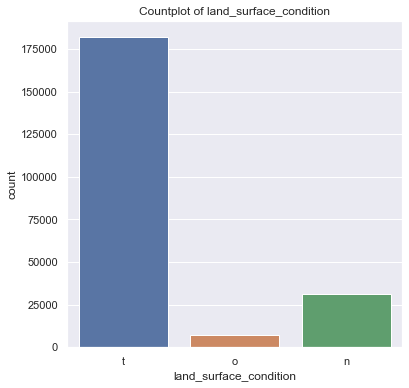

In [54]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(merge_data['land_surface_condition'])
plt.title('Countplot of land_surface_condition') 
plt.show

In [55]:
#is it a good predictor?
#chi-square
ct_job = pd.crosstab(merge_data.damage_grade, merge_data.land_surface_condition)
chi2_contingency(ct_job, correction = False)#good predictor


(335.726707022732,
 2.1154719249452806e-71,
 4,
 array([[  2728.17485092,    636.22261163,  15883.60253746],
        [ 17834.62100692,   4159.11361053, 103834.26538254],
        [ 10740.20414216,   2504.66377784,  62530.13208   ]]))

'foundation_type' (type: categorical): type of foundation used while building

In [56]:
merge_data['foundation_type'].value_counts()

r    189936
w     14564
u     10716
i      4360
h      1275
Name: foundation_type, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

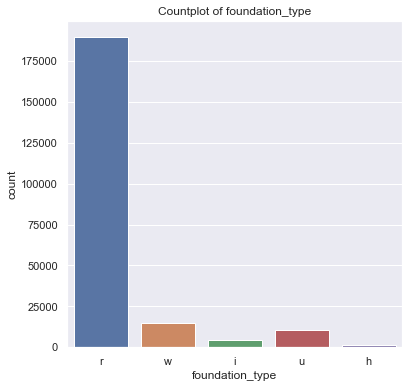

In [57]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(merge_data['foundation_type'])
plt.title('Countplot of foundation_type') 
plt.show

In [58]:
#is it a good predictor?
#chi-square
ct_job = pd.crosstab(merge_data.damage_grade, merge_data.foundation_type)
chi2_contingency(ct_job, correction = False)#good predictor

(30225.461386949013,
 0.0,
 8,
 array([[   111.12107258,    379.99049133,  16553.64081666,
            933.93993235,   1269.30768708],
        [   726.42052787,   2484.07333451, 108214.43873018,
           6105.35088363,   8297.71652381],
        [   437.45839955,   1495.93617416,  65167.92045316,
           3676.70918402,   4996.97578911]]))

'roof_type' (type: categorical): type of roof used while building.

In [59]:
merge_data['roof_type'].value_counts()

n    159341
q     54467
x      7043
Name: roof_type, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

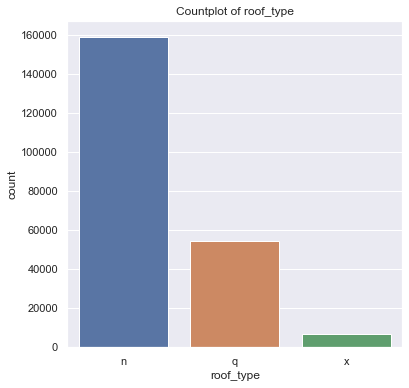

In [60]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(merge_data['roof_type'])
plt.title('Countplot of roof_type') 
plt.show

In [61]:
#is it a good predictor?
#chi-square
ct_job = pd.crosstab(merge_data.damage_grade, merge_data.roof_type)
chi2_contingency(ct_job, correction = False)#good predictor

(13642.52392760961,
 0.0,
 4,
 array([[13887.17084369,  4747.00506676,   613.82408954],
        [90783.19476932, 31032.1152089 ,  4012.69002178],
        [54670.63438698, 18687.87972434,  2416.48588868]]))

'ground_floor_type' (type: categorical): type of the ground floor

In [62]:
merge_data['ground_floor_type'].value_counts()

f    184416
x     20540
v     14679
z       821
m       395
Name: ground_floor_type, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

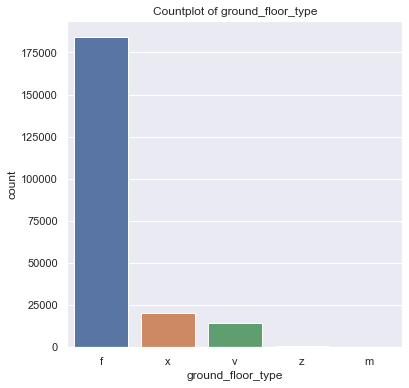

In [63]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(merge_data['ground_floor_type'])
plt.title('Countplot of ground_floor_type') 
plt.show

In [64]:
#is it a good predictor?
#chi-square
ct_job = pd.crosstab(merge_data.damage_grade, merge_data.ground_floor_type)
chi2_contingency(ct_job, correction = False)#good predictor

(20553.93692716931,
 0.0,
 8,
 array([[1.60725519e+04, 3.44257441e+01, 1.27933037e+03, 1.79013869e+03,
         7.15532554e+01],
        [1.05069465e+05, 2.25047928e+02, 8.36323681e+03, 1.17024923e+04,
         4.67757846e+02],
        [6.32739829e+04, 1.35526328e+02, 5.03643282e+03, 7.04736904e+03,
         2.81688899e+02]]))

'other_floor_type' (type: categorical): type of constructions used in higher than the ground floors (except of roof)

In [65]:
merge_data['other_floor_type'].value_counts()

q    143663
x     37018
j     35585
s      4585
Name: other_floor_type, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

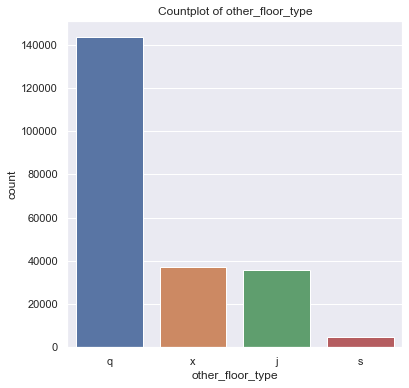

In [66]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(merge_data['other_floor_type'])
plt.title('Countplot of other_floor_type') 
plt.show

In [67]:
#is it a good predictor?
#chi-square
ct_job = pd.crosstab(merge_data.damage_grade, merge_data.other_floor_type)
chi2_contingency(ct_job, correction = False)#good predictor

(16123.06399050703,
 0.0,
 6,
 array([[ 3101.36734722, 12520.773843  ,   399.60009237,  3226.25871742],
        [20274.25449738, 81850.78611371,  2612.26519237, 21090.69419654],
        [12209.37815541, 49291.44004329,  1573.13471526, 12701.04708604]]))

'position' (type: categorical): position of the building

In [68]:
merge_data['position'].value_counts()

s    178596
t     35279
j      6468
o       508
Name: position, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

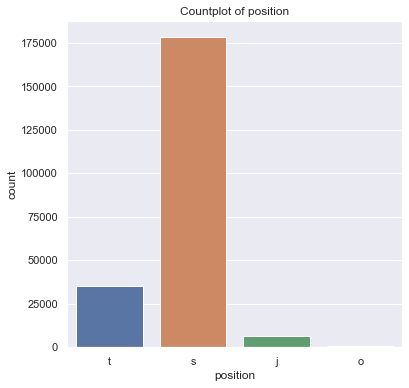

In [69]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(merge_data['position'])
plt.title('Countplot of position') 
plt.show

In [70]:
#is it a good predictor?
#chi-square
ct_job = pd.crosstab(merge_data.damage_grade, merge_data.position)
chi2_contingency(ct_job, correction = False)#good predictor

(1108.673441228739,
 2.771438948706572e-236,
 6,
 array([[5.63710665e+02, 4.42741215e+01, 1.55653169e+04, 3.07469829e+03],
        [3.68508861e+03, 2.89428728e+02, 1.01753569e+05, 2.00999136e+04],
        [2.21920073e+03, 1.74297151e+02, 6.12771140e+04, 1.21043881e+04]]))

'plan_configuration' (type: categorical): building plan configuration

In [71]:
merge_data['plan_configuration'].value_counts()

d    212989
q      4626
u      2495
s       250
c       176
a       172
o        83
n        29
f        18
m        13
Name: plan_configuration, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

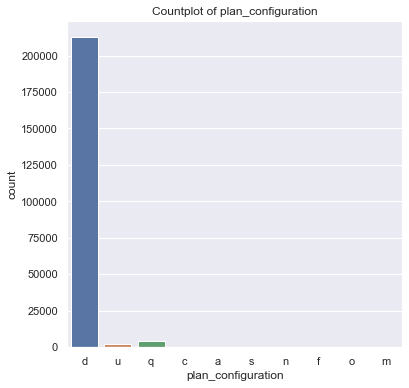

In [72]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(merge_data['plan_configuration'])
plt.title('Countplot of plan_configuration') 
plt.show

In [73]:
#is it a good predictor?
#chi-square
ct_job = pd.crosstab(merge_data.damage_grade, merge_data.plan_configuration)
chi2_contingency(ct_job, correction = False)#good predictor

(1461.910335740826,
 7.25407806105639e-300,
 18,
 array([[1.49904506e+01, 1.53390657e+01, 1.85627970e+04, 1.56876808e+00,
         1.13299917e+00, 2.52745969e+00, 7.23376394e+00, 4.03173397e+02,
         2.17884456e+01, 2.17448687e+02],
        [9.79955536e+01, 1.00274520e+02, 1.21348692e+05, 1.02553486e+01,
         7.40664068e+00, 1.65225061e+01, 4.72885520e+01, 2.63562460e+03,
         1.42435398e+02, 1.42150527e+03],
        [5.90139959e+01, 6.03864144e+01, 7.30775114e+04, 6.17588329e+00,
         4.46036015e+00, 9.95003419e+00, 2.84776840e+01, 1.58720200e+03,
         8.57761568e+01, 8.56046045e+02]]))

'has_superstructure_adobe_mud' (type: binary): flag variable that indicates if the superstructure was made of Adobe/Mud.

In [74]:
merge_data['has_superstructure_adobe_mud'].value_counts()

0    204505
1     16346
Name: has_superstructure_adobe_mud, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

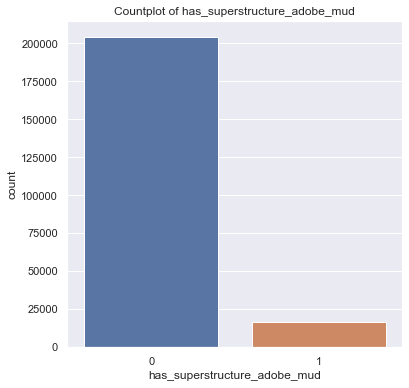

In [75]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(merge_data['has_superstructure_adobe_mud'])
plt.title('Countplot of has_superstructure_adobe_mud') 
plt.show

In [76]:
#is it a good predictor?
#chi-square
ct_job = pd.crosstab(merge_data.damage_grade, merge_data.has_superstructure_adobe_mud)
chi2_contingency(ct_job, correction = False)#good predictor

(693.9176930481365,
 2.0782007971899098e-151,
 2,
 array([[ 17823.38427265,   1424.61572735],
        [116515.00396195,   9312.99603805],
        [ 70166.6117654 ,   5608.3882346 ]]))

'has_superstructure_mud_mortar_stone' (type: binary): flag variable that indicates if the superstructure was made of Mud Mortar - Stone.

In [77]:
merge_data['has_superstructure_adobe_mud'].value_counts()

0    204505
1     16346
Name: has_superstructure_adobe_mud, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

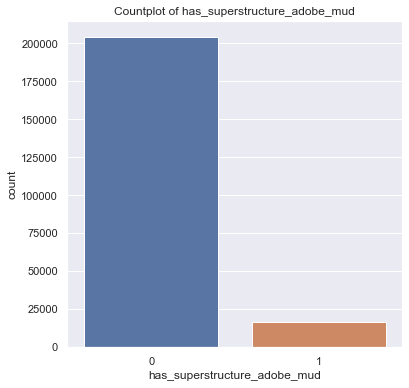

In [78]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(merge_data['has_superstructure_adobe_mud'])
plt.title('Countplot of has_superstructure_adobe_mud') 
plt.show

In [79]:
#is it a good predictor?
#chi-square
ct_job = pd.crosstab(merge_data.damage_grade, merge_data.has_superstructure_adobe_mud)
chi2_contingency(ct_job, correction = False)#good predictor

(693.9176930481365,
 2.0782007971899098e-151,
 2,
 array([[ 17823.38427265,   1424.61572735],
        [116515.00396195,   9312.99603805],
        [ 70166.6117654 ,   5608.3882346 ]]))

'has_superstructure_stone_flag' (type: binary): flag variable that indicates if the superstructure was made of Stone.

In [80]:
merge_data['has_superstructure_stone_flag'].value_counts()

0    213250
1      7601
Name: has_superstructure_stone_flag, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

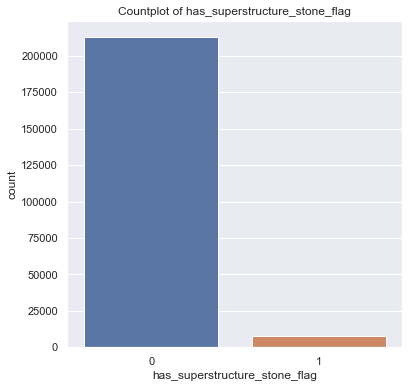

In [81]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(merge_data['has_superstructure_stone_flag'])
plt.title('Countplot of has_superstructure_stone_flag') 
plt.show

In [82]:
#is it a good predictor?
#chi-square
ct_job = pd.crosstab(merge_data.damage_grade, merge_data.has_superstructure_stone_flag)
chi2_contingency(ct_job, correction = False)#good predictor

(840.3114095771142,
 3.378281774000128e-183,
 2,
 array([[ 18585.54409987,    662.45590013],
        [121497.39417073,   4330.60582927],
        [ 73167.0617294 ,   2607.9382706 ]]))

'has_superstructure_cement_mortar_stone' (type: binary): flag variable that indicates if the superstructure was made of Cement Mortar - Stone.

In [83]:
merge_data['has_superstructure_cement_mortar_stone'].value_counts()

0    217309
1      3542
Name: has_superstructure_cement_mortar_stone, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

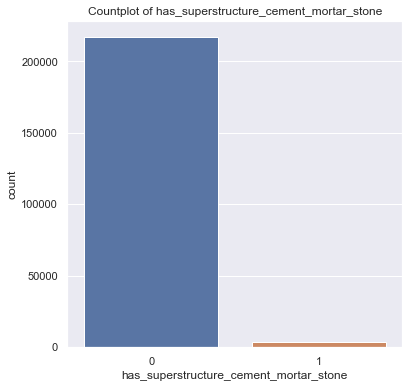

In [84]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(merge_data['has_superstructure_cement_mortar_stone'])
plt.title('Countplot of has_superstructure_cement_mortar_stone') 
plt.show

In [85]:
#is it a good predictor?
#chi-square
ct_job = pd.crosstab(merge_data.damage_grade, merge_data.has_superstructure_cement_mortar_stone)
chi2_contingency(ct_job, correction = False)#good predictor

(778.7234823810778,
 7.986276398708505e-170,
 2,
 array([[ 18939.30130269,    308.69869731],
        [123809.97528651,   2018.02471349],
        [ 74559.72341081,   1215.27658919]]))

'has_superstructure_mud_mortar_brick' (type: binary): flag variable that indicates if the superstructure was made of Mud Mortar - Brick.

In [86]:
merge_data['has_superstructure_mud_mortar_brick'].value_counts()

0    211079
1      9772
Name: has_superstructure_mud_mortar_brick, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

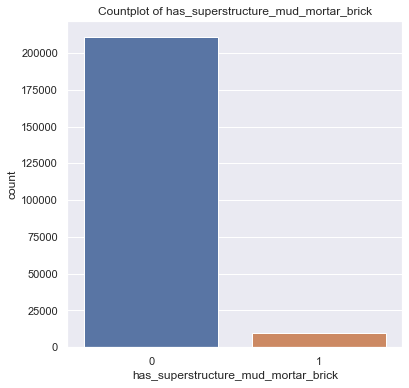

In [87]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(merge_data['has_superstructure_mud_mortar_brick'])
plt.title('Countplot of has_superstructure_mud_mortar_brick') 
plt.show

In [88]:
#is it a good predictor?
#chi-square
ct_job = pd.crosstab(merge_data.damage_grade, merge_data.has_superstructure_mud_mortar_brick)
chi2_contingency(ct_job, correction = False)#good predictor

(329.05354167351186,
 3.523151349415325e-72,
 2,
 array([[ 18396.33323825,    851.66676175],
        [120260.48517779,   5567.51482221],
        [ 72422.18158396,   3352.81841604]]))

'has_superstructure_cement_mortar_brick' (type: binary): flag variable that indicates if the superstructure was made of Cement Mortar - Brick.

In [89]:
merge_data['has_superstructure_cement_mortar_brick'].value_counts()

0    208027
1     12824
Name: has_superstructure_cement_mortar_brick, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

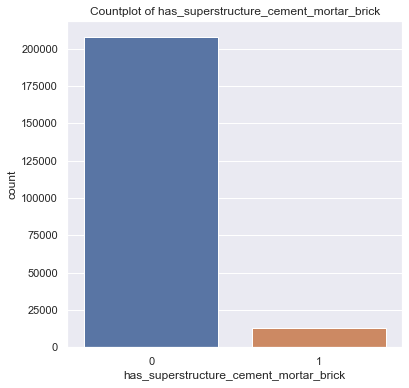

In [90]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(merge_data['has_superstructure_cement_mortar_brick'])
plt.title('Countplot of has_superstructure_cement_mortar_brick') 
plt.show

In [91]:
#is it a good predictor?
#chi-square
ct_job = pd.crosstab(merge_data.damage_grade, merge_data.has_superstructure_cement_mortar_brick)
chi2_contingency(ct_job, correction = False)#good predictor

(16198.026150453266,
 0.0,
 2,
 array([[ 18130.33989432,   1117.66010568],
        [118521.63384363,   7306.36615637],
        [ 71375.02626205,   4399.97373795]]))

'has_superstructure_timber' (type: binary): flag variable that indicates if the superstructure was made of Timber.

In [92]:
merge_data['has_superstructure_timber'].value_counts()

0    162161
1     58690
Name: has_superstructure_timber, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

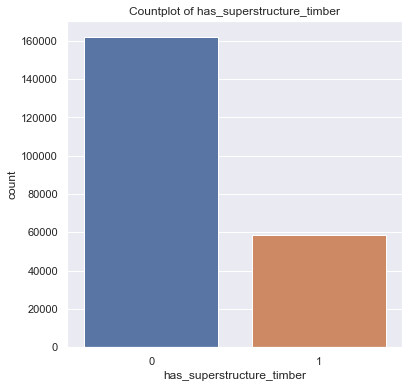

In [93]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(merge_data['has_superstructure_timber'])
plt.title('Countplot of has_superstructure_timber') 
plt.show

In [94]:
#is it a good predictor?
#chi-square
ct_job = pd.crosstab(merge_data.damage_grade, merge_data.has_superstructure_timber)
chi2_contingency(ct_job, correction = False)#good predictor

(2309.8322368853005,
 0.0,
 2,
 array([[14132.9445101 ,  5115.0554899 ],
        [92389.86605449, 33438.13394551],
        [55638.18943541, 20136.81056459]]))

'has_superstructure_bamboo' (type: binary): flag variable that indicates if the superstructure was made of Bamboo.

In [95]:
merge_data['has_superstructure_bamboo'].value_counts()

0    200896
1     19955
Name: has_superstructure_bamboo, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

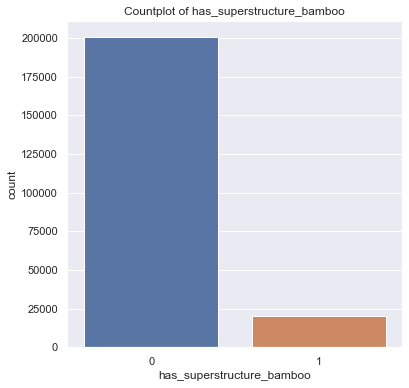

In [96]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(merge_data['has_superstructure_bamboo'])
plt.title('Countplot of has_superstructure_bamboo') 
plt.show

In [97]:
#is it a good predictor?
#chi-square
ct_job = pd.crosstab(merge_data.damage_grade, merge_data.has_superstructure_bamboo)
chi2_contingency(ct_job, correction = False)#good predictor

(1507.9608795332097,
 0.0,
 2,
 array([[ 17508.84627192,   1739.15372808],
        [114458.80656189,  11369.19343811],
        [ 68928.34716619,   6846.65283381]]))

'has_superstructure_rc_non_engineered' (type: binary): flag variable that indicates if the superstructure was made of non-engineered reinforced concrete.

In [98]:
merge_data['has_superstructure_rc_non_engineered'].value_counts()

0    214357
1      6494
Name: has_superstructure_rc_non_engineered, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

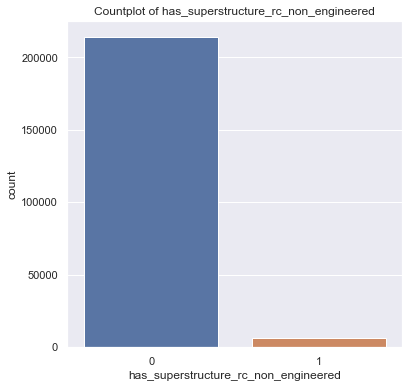

In [99]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(merge_data['has_superstructure_rc_non_engineered'])
plt.title('Countplot of has_superstructure_rc_non_engineered') 
plt.show

In [100]:
#is it a good predictor?
#chi-square
ct_job = pd.crosstab(merge_data.damage_grade, merge_data.has_superstructure_rc_non_engineered)
chi2_contingency(ct_job, correction = False)#good predictor

(3911.931065209811,
 0.0,
 2,
 array([[ 18682.023337 ,    565.976663 ],
        [122128.0981114,   3699.9018886],
        [ 73546.8785516,   2228.1214484]]))

'has_superstructure_rc_engineered' (type: binary): flag variable that indicates if the superstructure was made of engineered reinforced concrete.

In [101]:
merge_data['has_superstructure_rc_engineered'].value_counts()

0    219488
1      1363
Name: has_superstructure_rc_engineered, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

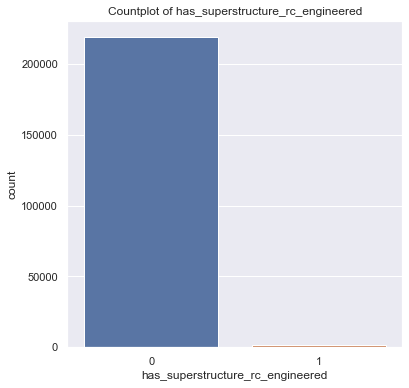

In [102]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(merge_data['has_superstructure_rc_engineered'])
plt.title('Countplot of has_superstructure_rc_engineered') 
plt.show

In [103]:
#is it a good predictor?
#chi-square
ct_job = pd.crosstab(merge_data.damage_grade, merge_data.has_superstructure_rc_engineered)
chi2_contingency(ct_job, correction = False)#good predictor

(4884.896033470377,
 0.0,
 2,
 array([[1.91292094e+04, 1.18790605e+02],
        [1.25051442e+05, 7.76557788e+02],
        [7.53073484e+04, 4.67651607e+02]]))

'has_superstructure_other' (type: binary): flag variable that indicates if the superstructure was made of any other material

In [104]:
merge_data['has_superstructure_other'].value_counts()

0    217537
1      3314
Name: has_superstructure_other, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

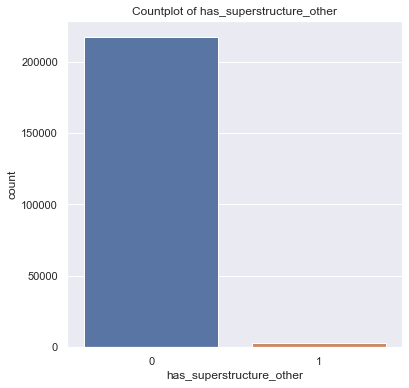

In [105]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(merge_data['has_superstructure_other'])
plt.title('Countplot of has_superstructure_other') 
plt.show

In [106]:
#is it a good predictor?
#chi-square
ct_job = pd.crosstab(merge_data.damage_grade, merge_data.has_superstructure_other)
chi2_contingency(ct_job, correction = False)#good predictor

(445.06677764152755,
 2.2645253979694408e-97,
 2,
 array([[ 18959.17236508,    288.82763492],
        [123939.87636914,   1888.12363086],
        [ 74637.95126579,   1137.04873421]]))

'legal_ownership_status' (type: categorical): legal ownership status of the land where building was built

In [107]:
merge_data['legal_ownership_status'].value_counts()

v    212264
a      5165
w      2239
r      1183
Name: legal_ownership_status, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

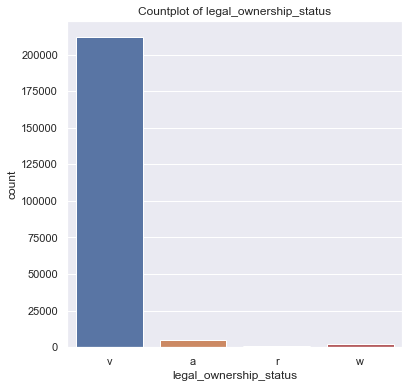

In [108]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(merge_data['legal_ownership_status'])
plt.title('Countplot of legal_ownership_status') 
plt.show

In [109]:
#is it a good predictor?
#chi-square
ct_job = pd.crosstab(merge_data.damage_grade, merge_data.legal_ownership_status)
chi2_contingency(ct_job, correction = False)#good predictor

(2904.875426575137,
 0.0,
 6,
 array([[4.50149286e+02, 1.03102925e+02, 1.84996105e+04, 1.95137319e+02],
        [2.94271531e+03, 6.74004302e+02, 1.20935629e+05, 1.27565142e+03],
        [1.77213540e+03, 4.05892774e+02, 7.28287606e+04, 7.68211260e+02]]))

'count_families' (type: int(ordinal)): number of families that live in the building.

In [110]:
merge_data['count_families'].value_counts()

1    193793
0     17120
2      8610
3      1090
4       190
5        36
6         9
7         2
9         1
Name: count_families, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

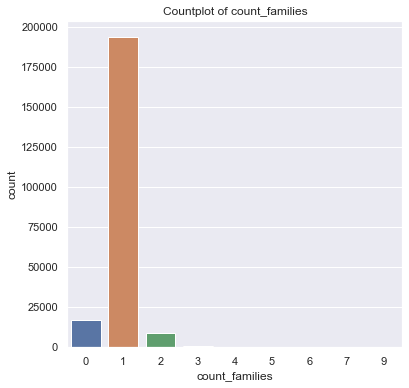

In [111]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(merge_data['count_families'])
plt.title('Countplot of count_families') 
plt.show

In [112]:
#is it a good predictor?
#chi-square
ct_job = pd.crosstab(merge_data.damage_grade, merge_data.count_families)
chi2_contingency(ct_job, correction = False)#good predictor

(1128.7079445267293,
 2.9378208421847363e-230,
 16,
 array([[1.49207275e+03, 1.68897930e+04, 7.50394067e+02, 9.49976228e+01,
         1.65592187e+01, 3.13753617e+00, 7.84384042e-01, 1.74307565e-01,
         8.71537824e-02],
        [9.75397603e+03, 1.10411932e+05, 4.90547509e+03, 6.21018334e+02,
         1.08250902e+02, 2.05106973e+01, 5.12767431e+00, 1.13948318e+00,
         5.69741590e-01],
        [5.87395122e+03, 6.64912750e+04, 2.95413084e+03, 3.73984044e+02,
         6.51898791e+01, 1.23517666e+01, 3.08794164e+00, 6.86209254e-01,
         3.43104627e-01]]))

'has_secondary_use' (type: binary): flag variable that indicates if the building was used for any secondary purpose.

In [113]:
merge_data['has_secondary_use'].value_counts()

0    198878
1     21973
Name: has_secondary_use, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

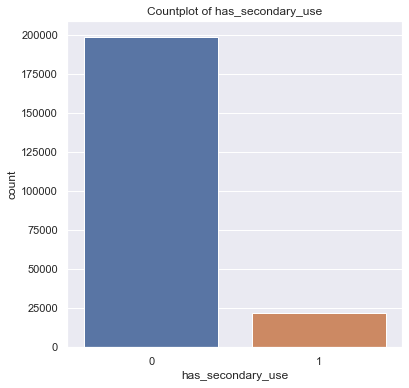

In [114]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(merge_data['has_secondary_use'])
plt.title('Countplot of has_secondary_use') 
plt.show

In [115]:
#is it a good predictor?
#chi-square
ct_job = pd.crosstab(merge_data.damage_grade, merge_data.has_secondary_use)
chi2_contingency(ct_job, correction = False)#good predictor

(507.72297668829276,
 5.615086415527828e-111,
 2,
 array([[ 17332.96993901,   1915.03006099],
        [113309.06803229,  12518.93196771],
        [ 68235.9620287 ,   7539.0379713 ]]))

'has_secondary_use_agriculture' (type: binary): flag variable that indicates if the building was used for agricultural purposes.

In [116]:
merge_data['has_secondary_use_agriculture'].value_counts()

0    205980
1     14871
Name: has_secondary_use_agriculture, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

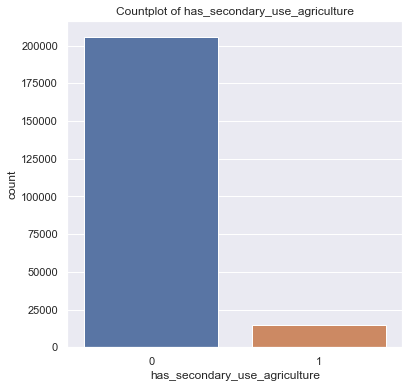

In [117]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(merge_data['has_secondary_use_agriculture'])
plt.title('Countplot of has_secondary_use_agriculture') 
plt.show

In [118]:
#is it a good predictor?
#chi-square
ct_job = pd.crosstab(merge_data.damage_grade, merge_data.has_secondary_use_agriculture)
chi2_contingency(ct_job, correction = False)#good predictor

(418.1244643158689,
 1.60481952459408e-91,
 2,
 array([[ 17951.93610172,   1296.06389828],
        [117355.37280791,   8472.62719209],
        [ 70672.69109037,   5102.30890963]]))

'has_secondary_use_hotel' (type: binary): flag variable that indicates if the building was used as a hotel.

In [119]:
merge_data['has_secondary_use_hotel'].value_counts()

0    215744
1      5107
Name: has_secondary_use_hotel, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

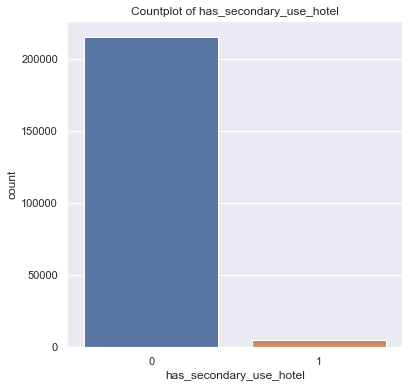

In [120]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(merge_data['has_secondary_use_hotel'])
plt.title('Countplot of has_secondary_use_hotel') 
plt.show

In [121]:
#is it a good predictor?
#chi-square
ct_job = pd.crosstab(merge_data.damage_grade, merge_data.has_secondary_use_hotel)
chi2_contingency(ct_job, correction = False)#good predictor

(961.8051843871723,
 1.4017090500808142e-209,
 2,
 array([[ 18802.90563321,    445.09436679],
        [122918.3296974 ,   2909.6703026 ],
        [ 74022.76466939,   1752.23533061]]))

'has_secondary_use_rental' (type: binary): flag variable that indicates if the building was used for rental purposes.

In [122]:
merge_data['has_secondary_use_rental'].value_counts()

0    219854
1       997
Name: has_secondary_use_rental, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

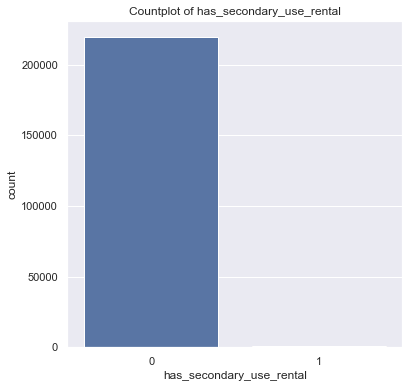

In [123]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(merge_data['has_secondary_use_rental'])
plt.title('Countplot of has_secondary_use_rental') 
plt.show

In [124]:
#is it a good predictor?
#chi-square
ct_job = pd.crosstab(merge_data.damage_grade, merge_data.has_secondary_use_rental)
chi2_contingency(ct_job, correction = False)#good predictor

(922.0717568389714,
 5.951987945942443e-201,
 2,
 array([[1.91611077e+04, 8.68923211e+01],
        [1.25259968e+05, 5.68032366e+02],
        [7.54329247e+04, 3.42075313e+02]]))

'has_secondary_use_institution' (type: binary): flag variable that indicates if the building was used as a location of any institution

In [125]:
merge_data['has_secondary_use_institution'].value_counts()

0    220744
1       107
Name: has_secondary_use_institution, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

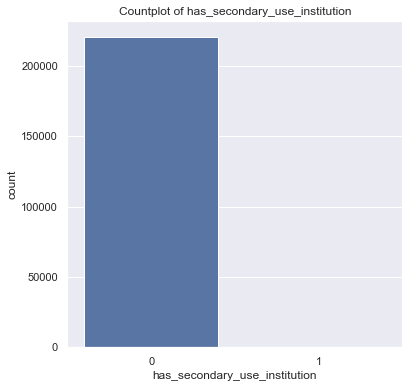

In [126]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(merge_data['has_secondary_use_institution'])
plt.title('Countplot of has_secondary_use_institution') 
plt.show

In [127]:
#is it a good predictor?
#chi-square
ct_job = pd.crosstab(merge_data.damage_grade, merge_data.has_secondary_use_institution)
chi2_contingency(ct_job, correction = False)#good predictor

(83.01459516979043,
 9.410435019246026e-19,
 2,
 array([[1.92386745e+04, 9.32545472e+00],
        [1.25767038e+05, 6.09623502e+01],
        [7.57382878e+04, 3.67121951e+01]]))

'has_secondary_use_school' (type: binary): flag variable that indicates if the building was used as a school.

In [128]:
merge_data['has_secondary_use_school'].value_counts()

0    220819
1        32
Name: has_secondary_use_school, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

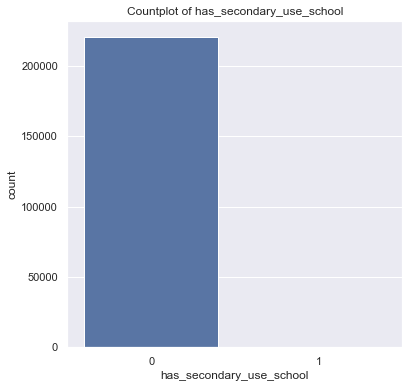

In [129]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(merge_data['has_secondary_use_school'])
plt.title('Countplot of has_secondary_use_school') 
plt.show

In [130]:
#is it a good predictor?
#chi-square
ct_job = pd.crosstab(merge_data.damage_grade, merge_data.has_secondary_use_school)
chi2_contingency(ct_job, correction = False)#good predictor

(7.2511794568931585,
 0.02663338623867653,
 2,
 array([[1.92452111e+04, 2.78892104e+00],
        [1.25809768e+05, 1.82317309e+01],
        [7.57640207e+04, 1.09793481e+01]]))

'has_secondary_use_industry' (type: binary): flag variable that indicates if the building was used for industrial purposes.

In [131]:
merge_data['has_secondary_use_industry'].value_counts()

0    220664
1       187
Name: has_secondary_use_industry, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

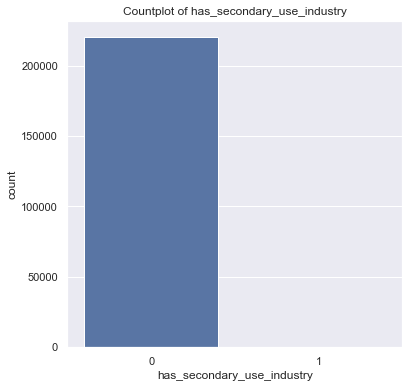

In [132]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(merge_data['has_secondary_use_industry'])
plt.title('Countplot of has_secondary_use_industry') 
plt.show

In [133]:
#is it a good predictor?
#chi-square
ct_job = pd.crosstab(merge_data.damage_grade, merge_data.has_secondary_use_industry)
chi2_contingency(ct_job, correction = False)#good predictor

(51.70284701094511,
 5.927470786379743e-12,
 2,
 array([[1.92317022e+04, 1.62977573e+01],
        [1.25721458e+05, 1.06541677e+02],
        [7.57108394e+04, 6.41605653e+01]]))

'has_secondary_use_health_post' (type: binary): flag variable that indicates if the building was used as a health post.

In [134]:
merge_data['has_secondary_use_health_post'].value_counts()

0    220823
1        28
Name: has_secondary_use_health_post, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

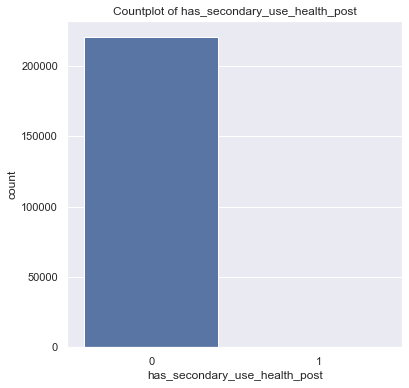

In [135]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(merge_data['has_secondary_use_health_post'])
plt.title('Countplot of has_secondary_use_health_post') 
plt.show

In [136]:
#is it a good predictor?
#chi-square
ct_job = pd.crosstab(merge_data.damage_grade, merge_data.has_secondary_use_health_post)
chi2_contingency(ct_job, correction = False)#good predictor

(7.236563319581903,
 0.026828737805730862,
 2,
 array([[1.92455597e+04, 2.44030591e+00],
        [1.25812047e+05, 1.59527645e+01],
        [7.57653931e+04, 9.60692956e+00]]))

'has_secondary_use_gov_office' (type: binary): flag variable that indicates if the building was used fas a government office.

In [137]:
merge_data['has_secondary_use_gov_office'].value_counts()

0    220835
1        16
Name: has_secondary_use_gov_office, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

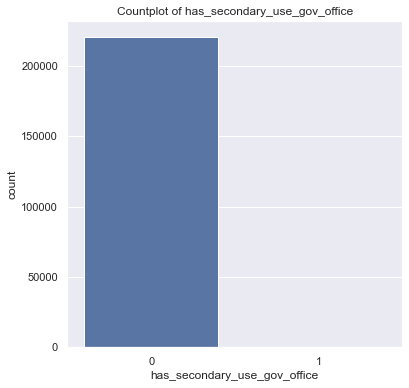

In [138]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(merge_data['has_secondary_use_gov_office'])
plt.title('Countplot of has_secondary_use_gov_office') 
plt.show

In [139]:
#is it a good predictor?
#chi-square
ct_job = pd.crosstab(merge_data.damage_grade, merge_data.has_secondary_use_gov_office)
chi2_contingency(ct_job, correction = False)#bad predictor

(3.9851590920168087,
 0.13634326770526844,
 2,
 array([[1.92466055e+04, 1.39446052e+00],
        [1.25818884e+05, 9.11586545e+00],
        [7.57695103e+04, 5.48967403e+00]]))

In [140]:
#dropping of the 'has_secondary_use_gov_office' column because p>0.05
merge_data.drop(['has_secondary_use_gov_office'],axis=1,inplace=True)

'has_secondary_use_use_police' (type: binary): flag variable that indicates if the building was used as a police station.

In [141]:
merge_data['has_secondary_use_use_police'].value_counts()

0    220833
1        18
Name: has_secondary_use_use_police, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

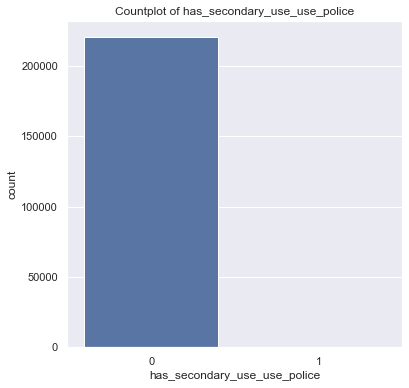

In [142]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(merge_data['has_secondary_use_use_police'])
plt.title('Countplot of has_secondary_use_use_police') 
plt.show

In [143]:
#is it a good predictor?
#chi-square
ct_job = pd.crosstab(merge_data.damage_grade, merge_data.has_secondary_use_use_police)
chi2_contingency(ct_job, correction = False)#bad predictor

(1.9118752052163541,
 0.3844515127736551,
 2,
 array([[1.92464312e+04, 1.56876808e+00],
        [1.25817745e+05, 1.02553486e+01],
        [7.57688241e+04, 6.17588329e+00]]))

In [144]:
#dropping of the 'has_secondary_use_use_police' column because p>0.05
merge_data.drop(['has_secondary_use_use_police'],axis=1,inplace=True)

'has_secondary_use_other' (type: binary): flag variable that indicates if the building was secondarily used for other purposes.

In [145]:
merge_data['has_secondary_use_other'].value_counts()

0    219767
1      1084
Name: has_secondary_use_other, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

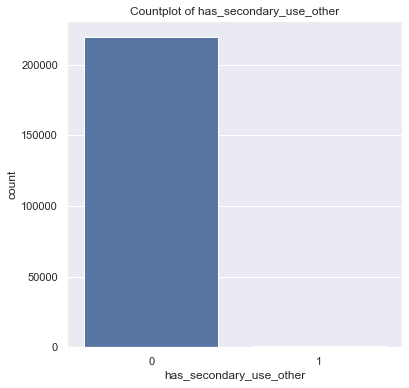

In [146]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(merge_data['has_secondary_use_other'])
plt.title('Countplot of has_secondary_use_other') 
plt.show

In [147]:
#is it a good predictor?
#chi-square
ct_job = pd.crosstab(merge_data.damage_grade, merge_data.has_secondary_use_other)
chi2_contingency(ct_job, correction = False)#good predictor

(46.66295358350848,
 7.366621813561567e-11,
 2,
 array([[1.91535253e+04, 9.44747001e+01],
        [1.25210400e+05, 6.17599884e+02],
        [7.54030746e+04, 3.71925416e+02]]))

In [148]:
merge_data.shape

(220851, 38)

In [149]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220851 entries, 0 to 260600
Data columns (total 38 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             220851 non-null  int64 
 1   geo_level_1_id                          220851 non-null  int64 
 2   geo_level_2_id                          220851 non-null  int64 
 3   geo_level_3_id                          220851 non-null  int64 
 4   count_floors_pre_eq                     220851 non-null  int64 
 5   age                                     220851 non-null  int64 
 6   area_percentage                         220851 non-null  int64 
 7   height_percentage                       220851 non-null  int64 
 8   land_surface_condition                  220851 non-null  object
 9   foundation_type                         220851 non-null  object
 10  roof_type                               220851 non-null 

RELATION OF PREDICTORS WITH TARGET VARIABLE 

<function matplotlib.pyplot.show(close=None, block=None)>

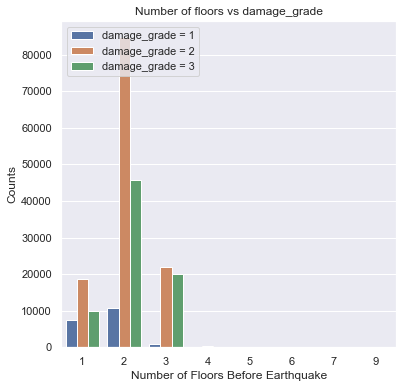

In [150]:
#count_floors_pre_eq vs damage_grade
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(merge_data['count_floors_pre_eq'],hue=merge_data['damage_grade'])
plt.ylabel("Counts")
plt.xlabel("Number of Floors Before Earthquake")
plt.title('Number of floors vs damage_grade') 
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

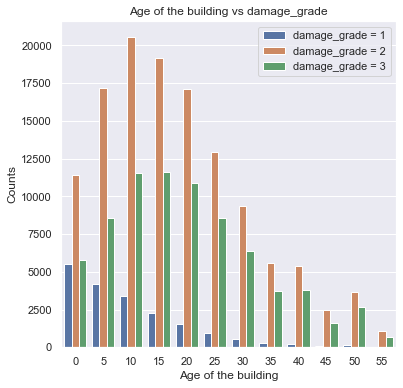

In [151]:
#age vs damage_grade
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(merge_data['age'],hue=merge_data['damage_grade'])
plt.ylabel("Counts")
plt.xlabel("Age of the building")
plt.title('Age of the building vs damage_grade') 
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

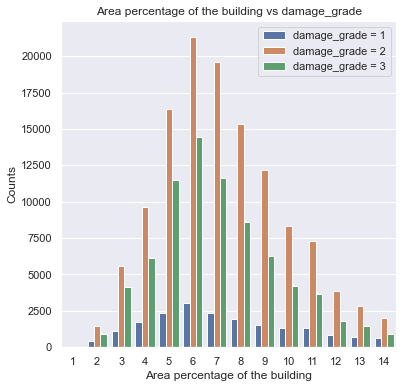

In [152]:
#area_percentage vs damage_grade
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(merge_data['area_percentage'],hue=merge_data['damage_grade'])
plt.ylabel("Counts")
plt.xlabel("Area percentage of the building")
plt.title('Area percentage of the building vs damage_grade') 
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show

-This is normalized percentage age of the building

<function matplotlib.pyplot.show(close=None, block=None)>

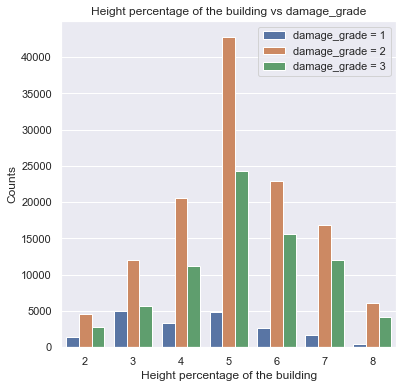

In [153]:
#height_percentage vs damage_grade
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(merge_data['height_percentage'],hue=merge_data['damage_grade'])
plt.ylabel("Counts")
plt.xlabel("Height percentage of the building")
plt.title('Height percentage of the building vs damage_grade') 
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

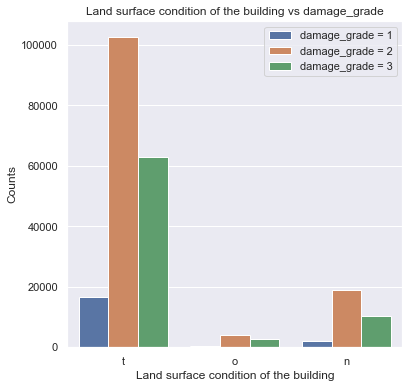

In [154]:
#land_surface_condition vs damage_grade
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(merge_data['land_surface_condition'],hue=merge_data['damage_grade'])
plt.ylabel("Counts")
plt.xlabel("Land surface condition of the building")
plt.title('Land surface condition of the building vs damage_grade') 
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

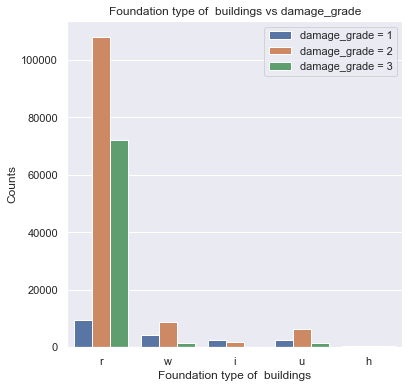

In [155]:
#foundation_type vs damage_grade
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(merge_data['foundation_type'],hue=merge_data['damage_grade'])
plt.ylabel("Counts")
plt.xlabel("Foundation type of  buildings")
plt.title('Foundation type of  buildings vs damage_grade') 
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

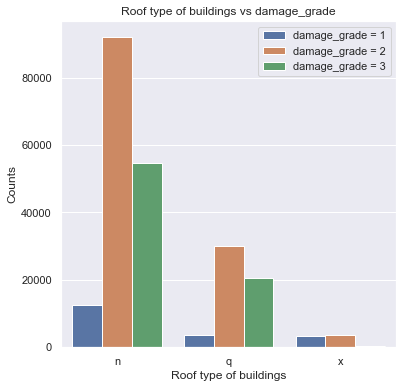

In [156]:
#roof_type vs damage_grade
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(merge_data['roof_type'],hue=merge_data['damage_grade'])
plt.ylabel("Counts")
plt.xlabel("Roof type of buildings")
plt.title('Roof type of buildings vs damage_grade') 
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

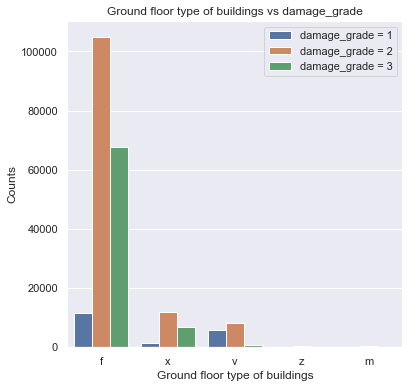

In [157]:
#ground_floor_type vs damage_grade
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(merge_data['ground_floor_type'],hue=merge_data['damage_grade'])
plt.ylabel("Counts")
plt.xlabel("Ground floor type of buildings")
plt.title('Ground floor type of buildings vs damage_grade') 
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

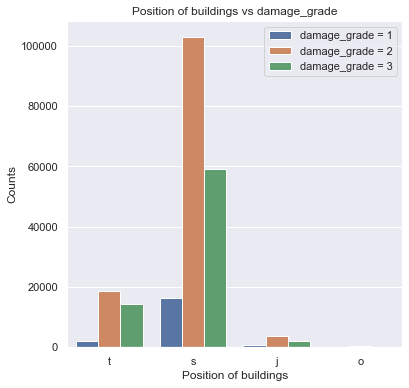

In [158]:
#position vs damage_grade
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(merge_data['position'],hue=merge_data['damage_grade'])
plt.ylabel("Counts")
plt.xlabel("Position of buildings")
plt.title('Position of buildings vs damage_grade') 
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

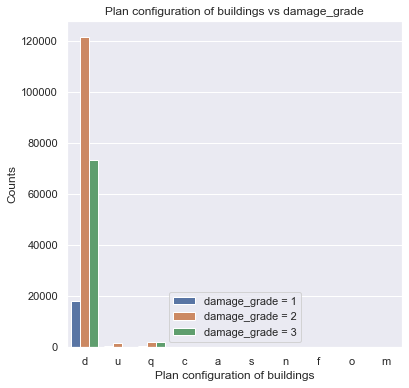

In [159]:
#plan_configuration vs damage_grade
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(merge_data['plan_configuration'],hue=merge_data['damage_grade'])
plt.ylabel("Counts")
plt.xlabel("Plan configuration of buildings")
plt.title('Plan configuration of buildings vs damage_grade') 
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

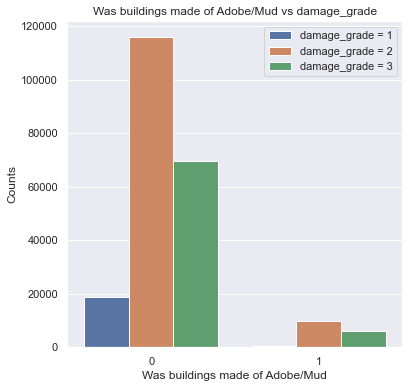

In [160]:
#has_superstructure_adobe_mud vs damage_grade
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(merge_data['has_superstructure_adobe_mud'],hue=merge_data['damage_grade'])
plt.ylabel("Counts")
plt.xlabel("Was buildings made of Adobe/Mud")
plt.title('Was buildings made of Adobe/Mud vs damage_grade') 
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

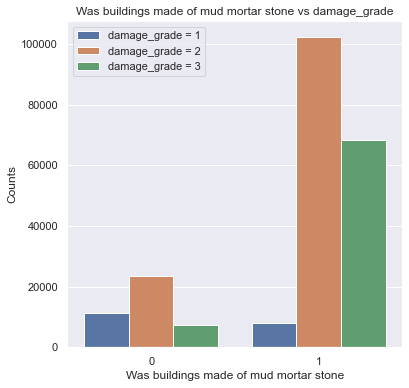

In [161]:
#has_superstructure_mud_mortar_stone vs damage_grade
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(merge_data['has_superstructure_mud_mortar_stone'],hue=merge_data['damage_grade'])
plt.ylabel("Counts")
plt.xlabel("Was buildings made of mud mortar stone")
plt.title('Was buildings made of mud mortar stone vs damage_grade') 
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

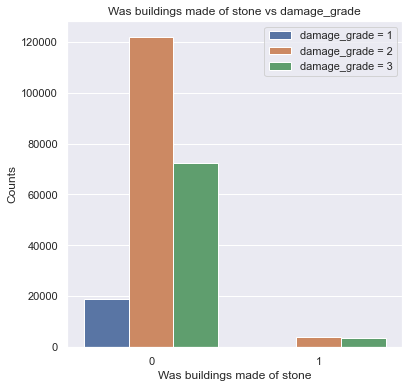

In [162]:
#has_superstructure_stone_flag vs damage_grade
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(merge_data['has_superstructure_stone_flag'],hue=merge_data['damage_grade'])
plt.ylabel("Counts")
plt.xlabel("Was buildings made of stone")
plt.title('Was buildings made of stone vs damage_grade') 
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

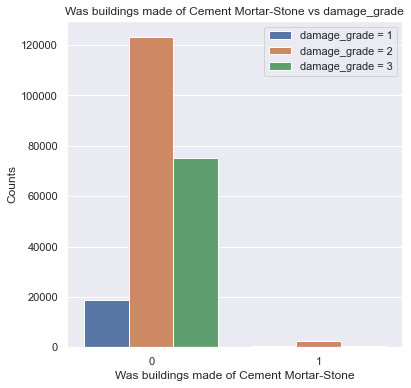

In [163]:
#has_superstructure_cement_mortar_stone vs damage_grade
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(merge_data['has_superstructure_cement_mortar_stone'],hue=merge_data['damage_grade'])
plt.ylabel("Counts")
plt.xlabel("Was buildings made of Cement Mortar-Stone")
plt.title('Was buildings made of Cement Mortar-Stone vs damage_grade') 
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

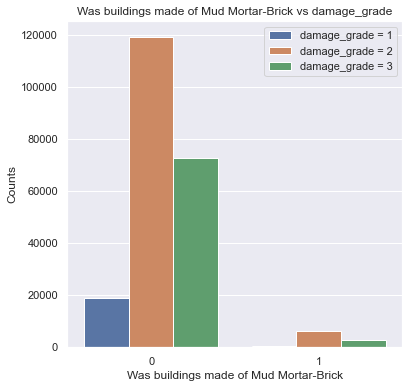

In [164]:
#has_superstructure_mud_mortar_brick vs damage_grade
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(merge_data['has_superstructure_mud_mortar_brick'],hue=merge_data['damage_grade'])
plt.ylabel("Counts")
plt.xlabel("Was buildings made of Mud Mortar-Brick")
plt.title('Was buildings made of Mud Mortar-Brick vs damage_grade') 
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

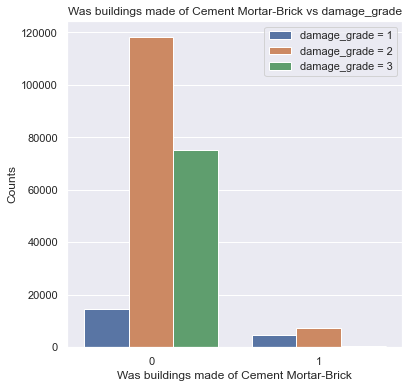

In [165]:
#has_superstructure_cement_mortar_brick vs damage_grade
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(merge_data['has_superstructure_cement_mortar_brick'],hue=merge_data['damage_grade'])
plt.ylabel("Counts")
plt.xlabel("Was buildings made of Cement Mortar-Brick")
plt.title('Was buildings made of Cement Mortar-Brick vs damage_grade') 
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

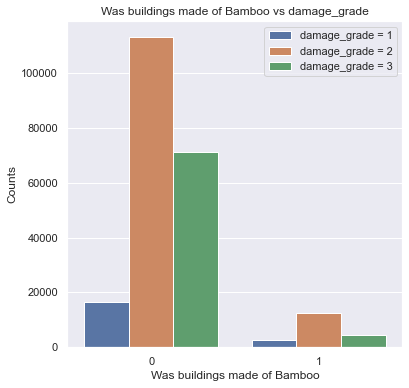

In [166]:
#has_superstructure_bamboo vs damage_grade
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(merge_data['has_superstructure_bamboo'],hue=merge_data['damage_grade'])
plt.ylabel("Counts")
plt.xlabel("Was buildings made of Bamboo")
plt.title('Was buildings made of Bamboo vs damage_grade') 
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

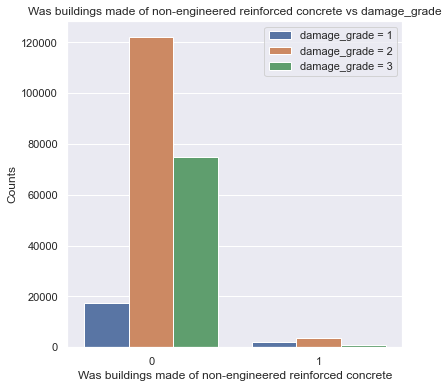

In [167]:
#has_superstructure_rc_non_engineered vs damage_grade
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(merge_data['has_superstructure_rc_non_engineered'],hue=merge_data['damage_grade'])
plt.ylabel("Counts")
plt.xlabel("Was buildings made of non-engineered reinforced concrete")
plt.title('Was buildings made of non-engineered reinforced concrete vs damage_grade') 
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

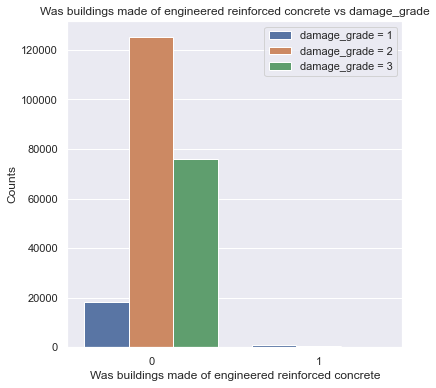

In [168]:
#has_superstructure_rc_engineered vs damage_grade
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(merge_data['has_superstructure_rc_engineered'],hue=merge_data['damage_grade'])
plt.ylabel("Counts")
plt.xlabel("Was buildings made of engineered reinforced concrete")
plt.title('Was buildings made of engineered reinforced concrete vs damage_grade') 
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

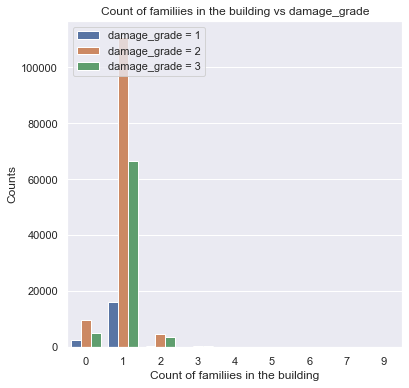

In [169]:
#count_families vs damage_grade
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(merge_data['count_families'],hue=merge_data['damage_grade'])
plt.ylabel("Counts")
plt.xlabel("Count of familiies in the building")
plt.title('Count of familiies in the building vs damage_grade') 
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show

# MODEL BUILDING

But before we build a model we have to convert numerical variables into number through label encoding

In [170]:
#label encoding 'land_surface_condition'
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
merge_data['land_surface_condition']= label_encoder.fit_transform(merge_data['land_surface_condition'])

In [171]:
merge_data['land_surface_condition'].value_counts()

2    182248
0     31303
1      7300
Name: land_surface_condition, dtype: int64

In [172]:
#label encoding 'foundation_type'
label_encoder = preprocessing.LabelEncoder()
merge_data['foundation_type']= label_encoder.fit_transform(merge_data['foundation_type'])

In [173]:
merge_data['foundation_type'].value_counts()

2    189936
4     14564
3     10716
1      4360
0      1275
Name: foundation_type, dtype: int64

In [174]:
#label encoding 'roof_type'
label_encoder = preprocessing.LabelEncoder()
merge_data['roof_type']= label_encoder.fit_transform(merge_data['roof_type'])

In [175]:
merge_data['roof_type'].value_counts()

0    159341
1     54467
2      7043
Name: roof_type, dtype: int64

In [176]:
#label encoding 'ground_floor_type'
label_encoder = preprocessing.LabelEncoder()
merge_data['ground_floor_type']= label_encoder.fit_transform(merge_data['ground_floor_type'])

In [177]:
merge_data['ground_floor_type'].value_counts()

0    184416
3     20540
2     14679
4       821
1       395
Name: ground_floor_type, dtype: int64

In [178]:
#label encoding 'other_floor_type'
label_encoder = preprocessing.LabelEncoder()
merge_data['other_floor_type']= label_encoder.fit_transform(merge_data['other_floor_type'])

In [179]:
merge_data['other_floor_type'].value_counts()

1    143663
3     37018
0     35585
2      4585
Name: other_floor_type, dtype: int64

In [180]:
#label encoding 'position'
label_encoder = preprocessing.LabelEncoder()
merge_data['position']= label_encoder.fit_transform(merge_data['position'])

In [181]:
merge_data['position'].value_counts()

2    178596
3     35279
0      6468
1       508
Name: position, dtype: int64

In [182]:
#label encoding 'plan_configuration'
label_encoder = preprocessing.LabelEncoder()
merge_data['plan_configuration']= label_encoder.fit_transform(merge_data['plan_configuration'])

In [183]:
merge_data['plan_configuration'].value_counts()

2    212989
7      4626
9      2495
8       250
1       176
0       172
6        83
5        29
3        18
4        13
Name: plan_configuration, dtype: int64

In [184]:
#label encoding 'plan_configuration'
label_encoder = preprocessing.LabelEncoder()
merge_data['plan_configuration']= label_encoder.fit_transform(merge_data['plan_configuration'])

In [185]:
merge_data['plan_configuration'].value_counts()

2    212989
7      4626
9      2495
8       250
1       176
0       172
6        83
5        29
3        18
4        13
Name: plan_configuration, dtype: int64

In [186]:
#label encoding 'legal_ownership_status'
label_encoder = preprocessing.LabelEncoder()
merge_data['legal_ownership_status']= label_encoder.fit_transform(merge_data['legal_ownership_status'])

In [187]:
merge_data['legal_ownership_status'].value_counts()

2    212264
0      5165
3      2239
1      1183
Name: legal_ownership_status, dtype: int64

In [188]:
#label encoding 'legal_ownership_status'
label_encoder = preprocessing.LabelEncoder()
merge_data['legal_ownership_status']= label_encoder.fit_transform(merge_data['legal_ownership_status'])

In [189]:
merge_data['count_families'].value_counts()

1    193793
0     17120
2      8610
3      1090
4       190
5        36
6         9
7         2
9         1
Name: count_families, dtype: int64

In [190]:
merge_data.head(5)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,2,2,0,0,1,3,2,1,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,1,2,0,3,1,2,2,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,2,2,0,0,3,3,2,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,2,2,0,0,3,2,2,0,1,0,0,0,0,1,1,0,0,0,2,1,0,0,0,0,0,0,0,0,0,2
5,333020,8,558,6089,2,10,9,5,2,2,0,0,1,2,2,0,1,0,0,0,0,0,0,0,0,0,2,1,1,1,0,0,0,0,0,0,0,2


In [191]:
#X and y
X=merge_data.drop('damage_grade',axis=1)
y=merge_data['damage_grade']

# Train Test Split

In [192]:
#train test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=45)

In [193]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# MODEL-1:Logistic Regression(without Smote)

In [194]:
y.value_counts()

2    125828
3     75775
1     19248
Name: damage_grade, dtype: int64

In [195]:
df_ovr = LogisticRegression(multi_class= 'ovr')
df_ovr.fit(X,y)

LogisticRegression(multi_class='ovr')

In [297]:
print("oaa_ovr=", df_ovr.score(X,y))

oaa_ovr= 0.569741590484082


In [197]:
# predictions
pred_ovr = df_ovr.predict(X)

In [198]:
print("ovr\n")
print(metrics.confusion_matrix(y, pred_ovr, labels = [1,2,3]))
print(metrics.classification_report(y, pred_ovr, labels = [1,2,3]))

ovr

[[     0  19248      0]
 [     0 125828      0]
 [     0  75775      0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00     19248
           2       0.57      1.00      0.73    125828
           3       0.00      0.00      0.00     75775

    accuracy                           0.57    220851
   macro avg       0.19      0.33      0.24    220851
weighted avg       0.32      0.57      0.41    220851



In [199]:
#______________another way! not ovr but , multinomial way!
df_mul = LogisticRegression(multi_class= 'multinomial')
df_mul.fit(X,y)

LogisticRegression(multi_class='multinomial')

In [298]:
Log_Reg_Multi_Acc=print("oaa=", df_mul.score(X,y)) 

oaa= 0.569741590484082


In [201]:
# predictions
pred_mul = df_mul.predict(X)

In [202]:
print("mul\n")
print(metrics.confusion_matrix(y, pred_mul, labels = [1,2,3]))
print(metrics.classification_report(y, pred_mul, labels = [1,2,3]))

mul

[[     0  19248      0]
 [     0 125828      0]
 [     0  75775      0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00     19248
           2       0.57      1.00      0.73    125828
           3       0.00      0.00      0.00     75775

    accuracy                           0.57    220851
   macro avg       0.19      0.33      0.24    220851
weighted avg       0.32      0.57      0.41    220851



# MODEL-2:Logistic Regression(with Smote)

In [203]:
merge_data['damage_grade'].value_counts()

2    125828
3     75775
1     19248
Name: damage_grade, dtype: int64

In [204]:
equal_1= merge_data[merge_data.damage_grade == 1]
equal_2= merge_data[merge_data.damage_grade == 2]
equal_3= merge_data[merge_data.damage_grade == 3]

In [205]:
from sklearn.utils import resample
def_oversample1 = resample(equal_3, replace = True,n_samples=len(equal_2),random_state=27)

In [206]:
def_oversample1.shape

(125828, 38)

In [207]:
from sklearn.utils import resample
def_oversample2= resample(equal_1, replace = True,n_samples=len(equal_2),random_state=27)

In [208]:
def_oversample2.shape

(125828, 38)

In [209]:
BCsmote1 = pd.concat([equal_2, def_oversample1,def_oversample2])

In [210]:
BCsmote1['damage_grade'].value_counts()

2    125828
3    125828
1    125828
Name: damage_grade, dtype: int64

In [211]:
#X and y
X1=BCsmote1.drop('damage_grade',axis=1)
y1=BCsmote1['damage_grade']

In [212]:
#train test
from sklearn.model_selection import train_test_split
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.20,random_state=45)

In [213]:
y1.value_counts()

2    125828
3    125828
1    125828
Name: damage_grade, dtype: int64

In [214]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X1_train = sc.fit_transform(X1_train)
X1_test = sc.transform(X1_test)

In [215]:
df_ovr_smote = LogisticRegression(multi_class= 'ovr')
df_ovr_smote.fit(X1,y1)

LogisticRegression(multi_class='ovr')

In [299]:
Log_Reg_SMOTE=print("oaa_ovr=", df_ovr_smote.score(X1,y1))

oaa_ovr= 0.4690874315202764


In [217]:
# predictions
pred_ovr_smote = df_ovr_smote.predict(X1)

In [218]:
print("ovr\n")
print(metrics.confusion_matrix(y1, pred_ovr_smote, labels = [1,2,3]))
print(metrics.classification_report(y1, pred_ovr_smote, labels = [1,2,3]))

ovr

[[91475  8644 25709]
 [48313 19885 57630]
 [43418 16697 65713]]
              precision    recall  f1-score   support

           1       0.50      0.73      0.59    125828
           2       0.44      0.16      0.23    125828
           3       0.44      0.52      0.48    125828

    accuracy                           0.47    377484
   macro avg       0.46      0.47      0.43    377484
weighted avg       0.46      0.47      0.43    377484



# Random Forest-(without smote)

In [219]:
from sklearn.ensemble import RandomForestClassifier

In [220]:
#create the model with 100 tress
rf=RandomForestClassifier(n_estimators=100,bootstrap=True,max_features='sqrt')

In [221]:
rfFit=rf.fit(X_train,y_train)

In [222]:
#actual class prediction
y_predRF=rfFit.predict(X_test)

In [223]:
len(y_predRF)

44171

In [224]:
y_predRF

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [225]:
#cross tab
pd.crosstab(y_test,y_predRF,margins=True,rownames=['Acctual'],colnames=['predict'])

predict,1,2,3,All
Acctual,,,,
1,1633,2273,86,3992
2,725,21331,3038,25094
3,109,6051,8925,15085
All,2467,29655,12049,44171


In [226]:
print(classification_report(y_test,y_predRF))

              precision    recall  f1-score   support

           1       0.66      0.41      0.51      3992
           2       0.72      0.85      0.78     25094
           3       0.74      0.59      0.66     15085

    accuracy                           0.72     44171
   macro avg       0.71      0.62      0.65     44171
weighted avg       0.72      0.72      0.71     44171



In [300]:
Ran_forr_noSMOTE=print(metrics.accuracy_score(y_test,y_predRF))

0.7219442620724005


In [317]:
Ran_forr_noSMOTE=accuracy_score(y_test,y_predRF)
Ran_forr_noSMOTE

0.7219442620724005

# Random Forest-SMOTE

In [228]:
#create the model with 100 tress
rf=RandomForestClassifier(n_estimators=100,bootstrap=True,max_features='sqrt')

In [229]:
rfFit_smote=rf.fit(X1_train,y1_train)

In [230]:
#actual class prediction
y1_predRF=rfFit_smote.predict(X1_test)

In [231]:
len(y1_predRF)

75497

In [232]:
y1_predRF

array([3, 3, 2, ..., 2, 1, 1], dtype=int64)

In [233]:
#cross tab
pd.crosstab(y1_test,y1_predRF,margins=True,rownames=['Acctual'],colnames=['predict'])

predict,1,2,3,All
Acctual,,,,
1,25216,56,0,25272
2,1585,19830,3684,25099
3,92,2409,22625,25126
All,26893,22295,26309,75497


In [301]:
print(classification_report(y1_test,y1_predRF))

              precision    recall  f1-score   support

           1       0.94      1.00      0.97     25272
           2       0.89      0.79      0.84     25099
           3       0.86      0.90      0.88     25126

    accuracy                           0.90     75497
   macro avg       0.90      0.90      0.89     75497
weighted avg       0.90      0.90      0.89     75497



In [318]:
print(metrics.accuracy_score(y1_test,y1_predRF))

0.8963402519305402


In [319]:
Ran_forr_SMOTE=accuracy_score(y1_test,y1_predRF)
Ran_forr_SMOTE

0.8963402519305402

# Grid search model

In [236]:
from sklearn.model_selection import GridSearchCV

In [237]:
param_grid={'bootstrap':[True],'max_depth':[5,6,7,8],'max_features':['auto','log2'],'n_estimators':[25,50]}

In [238]:
rfr_grid=RandomForestClassifier(random_state=1)

In [239]:
g_search=GridSearchCV(estimator=rfr_grid,param_grid=param_grid,cv=3)

In [240]:
gmod=g_search.fit(X1_train,y1_train)

In [241]:
#best parameters
print(gmod.best_params_)

{'bootstrap': True, 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 50}


In [242]:
gprd=gmod.predict(X1_test)

In [243]:
len(gprd)

75497

In [244]:
gprd

array([3, 2, 1, ..., 3, 1, 3], dtype=int64)

In [245]:
#cross tab
pd.crosstab(y1_test,gprd,margins=True,rownames=['Acctual'],colnames=['predict'])

predict,1,2,3,All
Acctual,,,,
1,16965,5021,3286,25272
2,3928,10567,10604,25099
3,930,5019,19177,25126
All,21823,20607,33067,75497


In [302]:
print(classification_report(y1_test,gprd))

              precision    recall  f1-score   support

           1       0.78      0.67      0.72     25272
           2       0.51      0.42      0.46     25099
           3       0.58      0.76      0.66     25126

    accuracy                           0.62     75497
   macro avg       0.62      0.62      0.61     75497
weighted avg       0.62      0.62      0.61     75497



In [247]:
print(metrics.accuracy_score(y1_test,gprd))

0.6186868352384863


In [321]:
Grid_acc=accuracy_score(y1_test,gprd)
Grid_acc

0.6186868352384863

# Random search model

In [248]:
rfr=RandomForestClassifier(random_state=1)

In [249]:
from sklearn.model_selection import RandomizedSearchCV
rfr_random=RandomizedSearchCV(estimator=rfr,param_distributions=param_grid,n_iter=20,cv=3,random_state=421)

In [250]:
rmod=rfr_random.fit(X1_train,y1_train)

In [251]:
#best parameters
print(rmod.best_params_)

{'n_estimators': 50, 'max_features': 'auto', 'max_depth': 8, 'bootstrap': True}


In [252]:
rprd=rmod.predict(X1_test)

In [253]:
len(rprd)

75497

In [254]:
rprd

array([3, 2, 1, ..., 3, 1, 3], dtype=int64)

In [255]:
#cross tab
pd.crosstab(y1_test,rprd,margins=True,rownames=['Acctual'],colnames=['predict'])

predict,1,2,3,All
Acctual,,,,
1,16965,5021,3286,25272
2,3928,10567,10604,25099
3,930,5019,19177,25126
All,21823,20607,33067,75497


In [256]:
print(classification_report(y1_test,rprd))

              precision    recall  f1-score   support

           1       0.78      0.67      0.72     25272
           2       0.51      0.42      0.46     25099
           3       0.58      0.76      0.66     25126

    accuracy                           0.62     75497
   macro avg       0.62      0.62      0.61     75497
weighted avg       0.62      0.62      0.61     75497



In [322]:
print(metrics.accuracy_score(y1_test,rprd))

0.6186868352384863


In [325]:
RanSearch_acc=accuracy_score(y1_test,rprd)
RanSearch_acc

0.6186868352384863

#  DECISION TREE

In [258]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from statsmodels.stats.stattools import durbin_watson

In [259]:
dt = DecisionTreeClassifier(max_features = None,
                            max_depth = 45,
                            min_samples_split = 3,
                            min_samples_leaf = 30,
                            random_state=42)

In [260]:
model = dt.fit(X1_train, y1_train)

In [261]:
dtprdt=model.predict(X1_test)

In [262]:
len(dtprdt)

75497

In [263]:
dtprdt

array([3, 2, 1, ..., 3, 1, 2], dtype=int64)

In [264]:
#cross tab
pd.crosstab(y1_test,dtprdt,margins=True,rownames=['Acctual'],colnames=['predict'])

predict,1,2,3,All
Acctual,,,,
1,22222,2587,463,25272
2,4526,15358,5215,25099
3,1175,5788,18163,25126
All,27923,23733,23841,75497


In [265]:
print(classification_report(y1_test,dtprdt))

              precision    recall  f1-score   support

           1       0.80      0.88      0.84     25272
           2       0.65      0.61      0.63     25099
           3       0.76      0.72      0.74     25126

    accuracy                           0.74     75497
   macro avg       0.73      0.74      0.74     75497
weighted avg       0.74      0.74      0.74     75497



In [266]:
print(metrics.accuracy_score(y1_test,dtprdt))

0.7383472190947985


In [327]:
DT_acc=accuracy_score(y1_test,dtprdt)
DT_acc

0.7383472190947985

# Adaptive Boosting


In [267]:
from sklearn.ensemble import AdaBoostClassifier

In [268]:
ada=AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=200)

In [269]:
adaFit=ada.fit(X1_train,y1_train)

In [270]:
predADA=ada.predict(X1_test)

In [271]:
predADA

array([3, 2, 1, ..., 2, 1, 3], dtype=int64)

In [272]:
#cross tab
pd.crosstab(y1_test,predADA,margins=True,rownames=['Acctual'],colnames=['predict'])

predict,1,2,3,All
Acctual,,,,
1,18994,5421,857,25272
2,5365,12557,7177,25099
3,1529,6224,17373,25126
All,25888,24202,25407,75497


In [273]:
print(classification_report(y1_test,predADA)) 

              precision    recall  f1-score   support

           1       0.73      0.75      0.74     25272
           2       0.52      0.50      0.51     25099
           3       0.68      0.69      0.69     25126

    accuracy                           0.65     75497
   macro avg       0.65      0.65      0.65     75497
weighted avg       0.65      0.65      0.65     75497



In [274]:
print(metrics.accuracy_score(y1_test,predADA))

0.6480257493675246


In [330]:
ADABoost_acc=accuracy_score(y1_test,predADA)
ADABoost_acc

0.6480257493675246

# GRADBOOST

In [275]:
from sklearn.ensemble import GradientBoostingClassifier

In [276]:
grad=GradientBoostingClassifier(learning_rate = 0.03, max_depth = 5, random_state = 0)

In [277]:
gradFit=grad.fit(X1_train,y1_train)

In [278]:
predGRAD=grad.predict(X1_test)

In [279]:
predGRAD

array([3, 2, 1, ..., 2, 1, 3], dtype=int64)

In [280]:
#cross tab
pd.crosstab(y1_test,predGRAD,margins=True,rownames=['Acctual'],colnames=['predict'])

predict,1,2,3,All
Acctual,,,,
1,19193,5226,853,25272
2,4919,13014,7166,25099
3,1302,6151,17673,25126
All,25414,24391,25692,75497


In [281]:
print(classification_report(y1_test,predGRAD))

              precision    recall  f1-score   support

           1       0.76      0.76      0.76     25272
           2       0.53      0.52      0.53     25099
           3       0.69      0.70      0.70     25126

    accuracy                           0.66     75497
   macro avg       0.66      0.66      0.66     75497
weighted avg       0.66      0.66      0.66     75497



In [282]:
print(metrics.accuracy_score(y1_test,predGRAD))

0.660688504178974


In [329]:
GBoost_acc=accuracy_score(y1_test,predGRAD)
GBoost_acc

0.660688504178974

# KNN

In [283]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [284]:
df_knn = knn.fit(X1_train, y1_train)

In [285]:
#Applying on Test data for prediction
y_predknn = df_knn.predict(X1_test)

In [286]:
  y_predknn

array([3, 1, 1, ..., 2, 1, 1], dtype=int64)

In [287]:
#cross tab
pd.crosstab(y1_test,y_predknn,margins=True,rownames=['Acctual'],colnames=['predict'])

predict,1,2,3,All
Acctual,,,,
1,24590,528,154,25272
2,4682,12214,8203,25099
3,1602,5017,18507,25126
All,30874,17759,26864,75497


In [288]:
print(classification_report(y1_test,y_predknn))

              precision    recall  f1-score   support

           1       0.80      0.97      0.88     25272
           2       0.69      0.49      0.57     25099
           3       0.69      0.74      0.71     25126

    accuracy                           0.73     75497
   macro avg       0.72      0.73      0.72     75497
weighted avg       0.72      0.73      0.72     75497



In [289]:
print(metrics.accuracy_score(y1_test,y_predknn))

0.7326251374226791


In [331]:
KNN_acc=accuracy_score(y1_test,y_predknn)
KNN_acc

0.7326251374226791

# Naïve Bayes

In [290]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()

In [291]:
NB_Model = NB.fit(X1_train, y1_train)

In [292]:
NB_Pred = NB_Model.predict(X1_test)

In [293]:
NB_Pred

array([3, 3, 2, ..., 3, 1, 3], dtype=int64)

In [294]:
# confusion_matrix
pd.crosstab(y1_test, NB_Pred, rownames = ['Actual'], colnames = ['Predicted'], margins = True)

Predicted,1,2,3,All
Actual,,,,
1,14202,1500,9570,25272
2,3830,1587,19682,25099
3,1480,887,22759,25126
All,19512,3974,52011,75497


In [295]:
print(classification_report(y1_test,NB_Pred))

              precision    recall  f1-score   support

           1       0.73      0.56      0.63     25272
           2       0.40      0.06      0.11     25099
           3       0.44      0.91      0.59     25126

    accuracy                           0.51     75497
   macro avg       0.52      0.51      0.44     75497
weighted avg       0.52      0.51      0.44     75497



In [296]:
print(metrics.accuracy_score(y1_test,NB_Pred))

0.5105898247612488


In [332]:
NB_acc=accuracy_score(y1_test,NB_Pred)
NB_acc

0.5105898247612488

# Logistic Regression(Without Smote)

In [338]:
from sklearn.linear_model import LogisticRegression

In [339]:
Logi_Reg = LogisticRegression()

In [341]:
LR_Model = Logi_Reg.fit(X_train, y_train)

In [342]:
Logi_Pred = LR_Model.predict(X_test)

In [343]:
Logi_Pred

array([2, 1, 2, ..., 2, 2, 2], dtype=int64)

In [344]:
# confusion_matrix

pd.crosstab(y_test, Logi_Pred, rownames = ['Actual'], colnames = ['Predicted'], margins = True)

Predicted,1,2,3,All
Actual,,,,
1,1023,2887,82,3992
2,716,22656,1722,25094
3,69,12935,2081,15085
All,1808,38478,3885,44171


In [345]:
confusion_matrix(y_test, Logi_Pred)

array([[ 1023,  2887,    82],
       [  716, 22656,  1722],
       [   69, 12935,  2081]], dtype=int64)

In [346]:
# classification_report

print(classification_report(y_test, Logi_Pred))

              precision    recall  f1-score   support

           1       0.57      0.26      0.35      3992
           2       0.59      0.90      0.71     25094
           3       0.54      0.14      0.22     15085

    accuracy                           0.58     44171
   macro avg       0.56      0.43      0.43     44171
weighted avg       0.57      0.58      0.51     44171



In [348]:
# accuracy_score

Logi_acc_noSmote = accuracy_score(y_test, Logi_Pred)
Logi_acc_noSmote 

0.58318806456725

# Logistic Regression(Smote)

In [349]:
from sklearn.linear_model import LogisticRegression

In [350]:
Logi_RegSmote = LogisticRegression()

In [352]:
LR_Model = Logi_RegSmote.fit(X1_train, y1_train)

In [353]:
Logi_PredSmote = LR_Model.predict(X1_test)

In [354]:
Logi_PredSmote

array([3, 2, 1, ..., 3, 1, 3], dtype=int64)

In [356]:
# confusion_matrix

pd.crosstab(y1_test, Logi_PredSmote, rownames = ['Actual'], colnames = ['Predicted'], margins = True)

Predicted,1,2,3,All
Actual,,,,
1,16757,3517,4998,25272
2,4498,8135,12466,25099
3,1857,6242,17027,25126
All,23112,17894,34491,75497


In [357]:
# classification_report

print(classification_report(y1_test, Logi_PredSmote))

              precision    recall  f1-score   support

           1       0.73      0.66      0.69     25272
           2       0.45      0.32      0.38     25099
           3       0.49      0.68      0.57     25126

    accuracy                           0.56     75497
   macro avg       0.56      0.55      0.55     75497
weighted avg       0.56      0.56      0.55     75497



In [358]:
# accuracy_score

Logi_acc_Smote = accuracy_score(y1_test, Logi_PredSmote)
Logi_acc_Smote 

0.555240605586977

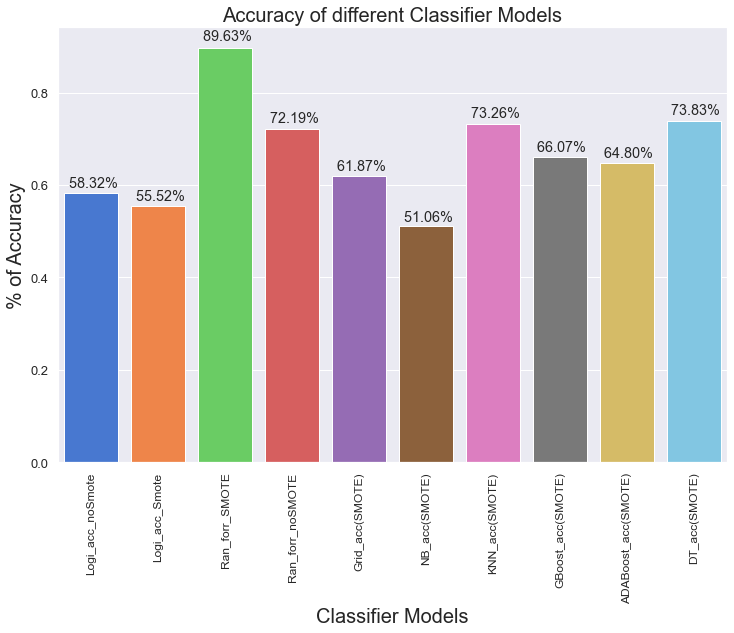

In [360]:
list_acc = [Logi_acc_noSmote,Logi_acc_Smote ,Ran_forr_SMOTE,Ran_forr_noSMOTE,Grid_acc,NB_acc,KNN_acc,GBoost_acc,ADABoost_acc,DT_acc]

list1 = ['Logi_acc_noSmote','Logi_acc_Smote','Ran_forr_SMOTE', 'Ran_forr_noSMOTE','Grid_acc(SMOTE)','NB_acc(SMOTE)','KNN_acc(SMOTE)','GBoost_acc(SMOTE)','ADABoost_acc(SMOTE)','DT_acc(SMOTE)']

plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style('darkgrid')
ax = sns.barplot(x = list1, y = list_acc, palette = 'muted', saturation = 1.5)
plt.xlabel('Classifier Models', fontsize = 20)
plt.ylabel('% of Accuracy', fontsize = 20)
plt.title('Accuracy of different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 90)
plt.yticks(fontsize = 13)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height : .2%}', (x + width/2, y + height*1.02), ha = 'center', fontsize = 'x-large')

plt.show()